Low fidelity models are those that would deliver a sub-optimal performance but at a much lower computational cost.

In [1]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import (
    RandomizedSearchCV,
    train_test_split,
)

# the models to optimize
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
y = y.map({0:1, 1:0})

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y.value_counts(normalize = True) # Normalize= true, retorna a media relativa dos valores

target
0    0.627417
1    0.372583
Name: proportion, dtype: float64

## Multi-delity

###

### Data size

In [4]:
svm_model = SVC(kernel = 'rbf', random_state=42)



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
param_grid = dict(
    C = stats.loguniform(0.001, 100),
    gamma = stats.loguniform(0.001, 100),
)

In [14]:
search = RandomizedSearchCV(svm_model,
                            param_grid,
                            scoring= 'accuracy',
                            cv = 5,
                            n_iter = 100,
                            random_state = 42,
                            n_jobs = 4,
                            refit = False,
)

In [17]:
print('Darker orange means better accuracy')

for size in [0.1, 0.2, 0.4, 0.8]:

    # subsample the data
    n_samples = int(size * len(X_train))
    
    if n_samples > 0:
        X_train_ = X_train.sample(n_samples, random_state=0)
        y_train_ = y_train[X_train_.index]

        # search
        ts = datetime.datetime.now()

        search.fit(X_train_, y_train_)

        td = (datetime.datetime.now()-ts).microseconds

        results = pd.DataFrame(search.cv_results_)

        # plot results
        plt.scatter(results['param_gamma'],
                    results['param_C'],
                    c=results['mean_test_score'],
                    cmap='Wistia',
                   )
        
        plt.title(f"Data fraction: {size}, time: {td}")
        plt.xlabel('gamma')
        plt.ylabel('C')
        plt.show()
    else:
        print(f"Data fraction: {size} is too small to sample.")

Darker orange means better accuracy
Data fraction: 0.1 is too small to sample.
Data fraction: 0.2 is too small to sample.
Data fraction: 0.4 is too small to sample.


ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=1.

In [18]:
# set up the model
rf = RandomForestClassifier(random_state=0)

# determine the hyperparameter space
# we will search over 2 hyperparameters for this demo

param_grid = dict(
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

In [19]:
# set up the search

search = RandomizedSearchCV(rf,
                            param_grid,
                            scoring='accuracy',
                            cv=2,
                            n_iter = 50,
                            random_state=10,
                            n_jobs=4,
                            refit=False,
                           )

Darker orange means better accuracy


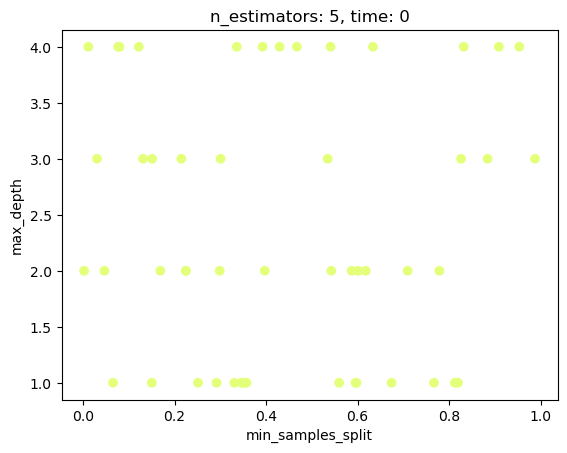

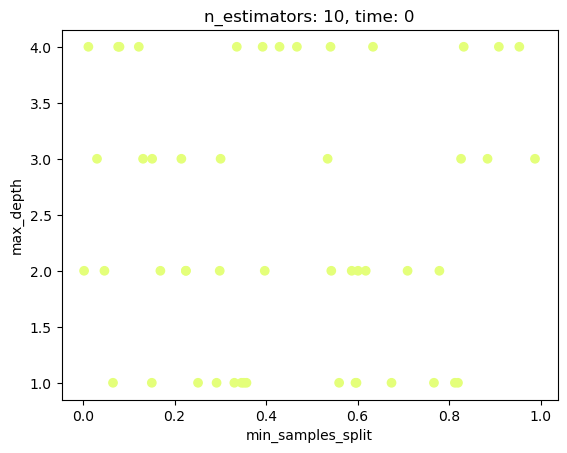

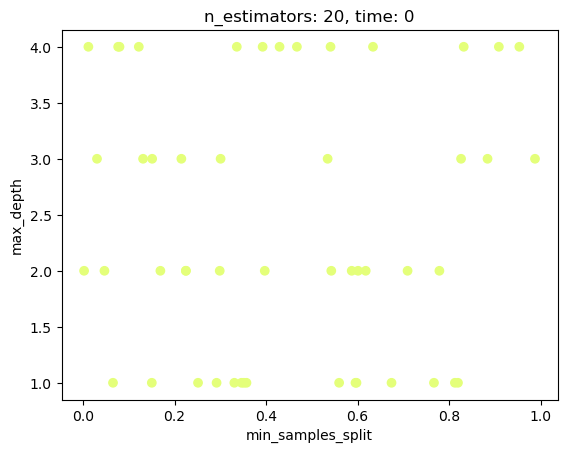

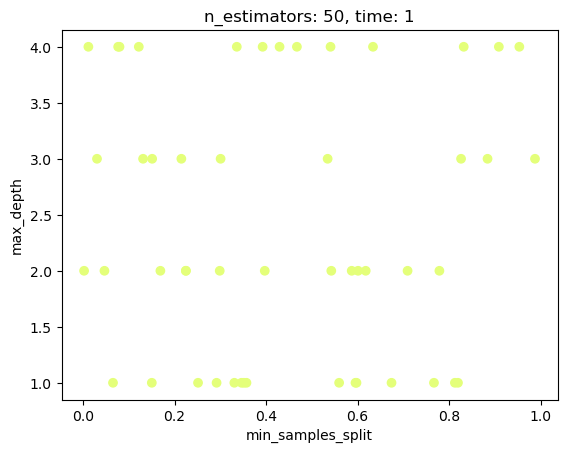

In [20]:
print('Darker orange means better accuracy')

for n_estimators in [5, 10, 20, 50]:

    # fix the n_estimators parameter
    rf.set_params(**{'n_estimators': n_estimators})

    # search
    ts = datetime.datetime.now()

    search.fit(X_train, y_train)

    td = (datetime.datetime.now()-ts).seconds

    results = pd.DataFrame(search.cv_results_)

    # plot results
    plt.scatter(results['param_min_samples_split'],
                results['param_max_depth'],
                c=results['mean_test_score'],
                cmap='Wistia',
               )
    
    plt.title(f"n_estimators: {n_estimators}, time: {td}")
    plt.xlabel('min_samples_split')
    plt.ylabel('max_depth')
    plt.show()